# Report

## 1. Introduction

This report was prepared for the first project of Udacity-"[Deep Reinforcement Learning Nanodegree Program](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)".

## 2. Learning Algorithm

I implemented [Deep Q-learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf) algorithm.

## 3. Implementation

### A. Network

| Layer | Type | Dimension |
|:---:|:---:|:---:|
| `Input` | Input (state) | 37 |
| `1st hidden layer` | Fully connected layer | 64 |
| `Activation function` | ReLu function | - |
| `2nd hidden layer` | Fully connected layer | 64 |
| `Activation function` | ReLu function | - |
| `Output` | Output (action) | 4 |

### B. Parameters

| Parameter | Description | Value |
|:---:|:---|:---:|
| `BUFFER_SIZE` | Replay buffer size | 100,000 |
| `BATCH_SIZE` | Minibatch size | 64 |
| `GAMMA` | Discount factor | 0.99 |
| `TAU` | For soft update of target parameters | 0.001 |
| `LR` | Learning rate | 0.0005 |
| `UPDATE_EVERY` | How often to update the network | 4 |
| `n_episodes` | Maximum number of training episodes | 1,500 |
| `max_t` | Maximum number of timesteps per episode | 1,000 |
| `eps_start` | Starting value of epsilon, for epsilon-greedy action selection | 1.0 |
| `eps_end` | Minimum value of epsilon | 0.01 |
| `eps_decay` | Multiplicative factor (per episode) for decreasing epsilon | 0.995 |

## 4. Execution

### A. Train & Test

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

from dqn_agent import Agent
from Navigation import train, test

In [2]:
env = UnityEnvironment(file_name=os.getcwd() + "/Banana_Windows_x86_64/Banana.exe")
agent = Agent(state_size=37, action_size=4, seed=0)

train_n_episodes = 1500
scores_train = train(env, agent, n_episodes=train_n_episodes)
saved_model = os.getcwd() + f'/checkpoints/checkpoint_dqn_{train_n_episodes}.pth'
scores_test = test(env, agent, n_episodes=100, saved_model=saved_model)

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.92
Episode 200	Average Score: 3.72
Episode 300	Average Score: 6.93
Episode 400	Average Score: 11.20
Episode 500	Average Score: 12.09
Episode 600	Average Score: 13.89
Episode 700	Average Score: 13.90
Episode 800	Average Score: 15.28
Episode 900	Average Score: 14.77
Episode 1000	Average Score: 16.30
Episode 1100	Average Score: 15.79
Episode 1200	Average Score: 16.69
Episode 1300	Average Score: 16.93
Episode 1400	Average Score: 15.59
Episode 1500	Average Score: 16.27
Sucessfully loaded from c:\Users\jihoon\Desktop\git\udacity_DRL_project_1/checkpoints/checkpoint_dqn_1500.pth
Episode 100	Average Score: 16.64
Test Average Score: 16.64


### B. Plot Rewards

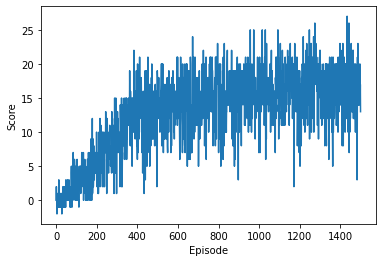

In [3]:
fig = plt.figure()
plt.plot(np.arange(len(scores_train)), scores_train)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

## 5. Ideas for Future Work

Performance comparison with the items below.
- Optimizing the hyperparameters.
- Deepening the network model.
- Using various algorithms instead of (vanilla) Deep Q-learning.

## +. Issues that I faced

### Python version Error (UnicodeDecodeError)

> UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfe in position 63: invalid start byte

-> [python version problem](https://knowledge.udacity.com/questions/524468)  
-> change from 3.8.11 to 3.6.13

(There was definitely a warning about the version, but I inadvertently overlooked it.)

### Action's datatype error (AttributeError)

> AttributeError: 'numpy.int64' object has no attribute 'keys'

-> [data type problem](https://github.com/xkiwilabs/DQN-using-PyTorch-and-ML-Agents/issues/2)  
-> change from 'numpy.int64' to 'numpy.int32'